In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os

# Paths to the input files
class1_file = 'Class1.txt'
class2_file = 'Class2.txt'
class3_file = 'Class3.txt'
nls_file = 'NLS.txt'

# Paths to the output files
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


# Load the dataset1
class1_data = np.loadtxt(class1_file, delimiter=' ')
class2_data = np.loadtxt(class2_file, delimiter=' ')
class3_data = np.loadtxt(class3_file, delimiter=' ')

# in nls file, the first  row is expalanation of data, so we skip it
# Load the data
with open(nls_file, 'r') as file:
    lines = file.readlines()
data2 = []
for line in lines[1:]:
    row = line.strip().split(' ')
    row = [float(val) for val in row]
    data2.append(row)
data2 = np.array(data2)

# Combine all classes into a single dataset
X1 = np.vstack((class1_data, class2_data, class3_data))
y1 = np.array([0]*len(class1_data) + [1]*len(class2_data) + [2]*len(class3_data))  # Assigning class labels 0, 1, 2

# Split Dataset 1 into training, validation, and test sets
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.4, stratify=y1, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, stratify=y1_temp, random_state=42)

# Separate features and labels based on provided information
X2 = data2
y2 = np.array([0]*300 + [1]*500 + [2]*1000)  # 0 for class 1, 1 for class 2, 2 for class 3

# Split Dataset 2 into training, validation, and test sets
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.4, stratify=y2, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, stratify=y2_temp, random_state=42)

# One-hot encode labels
y1_train_cat = to_categorical(y1_train, num_classes=3)
y1_val_cat = to_categorical(y1_val, num_classes=3)
y1_test_cat = to_categorical(y1_test, num_classes=3)

y2_train_cat = to_categorical(y2_train, num_classes=3)
y2_val_cat = to_categorical(y2_val, num_classes=3)
y2_test_cat = to_categorical(y2_test, num_classes=3)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3276 - loss: 0.3585 - val_accuracy: 0.3333 - val_loss: 0.3680
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 0.3554 - val_accuracy: 0.3333 - val_loss: 0.3608
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3455 - loss: 0.3412 - val_accuracy: 0.3333 - val_loss: 0.3536
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3452 - loss: 0.3383 - val_accuracy: 0.3333 - val_loss: 0.3460
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - loss: 0.3279 - val_accuracy: 0.3367 - val_loss: 0.3377
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3435 - loss: 0.3284 - val_accuracy: 0.3400 - val_loss: 0.3226
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3569 - loss: 0.3005 - val_accuracy: 0.3500 - val_loss: 0.2600
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3737 - loss: 0.2520 - val_accuracy: 0.3733 - val_loss: 0.2469
Epo

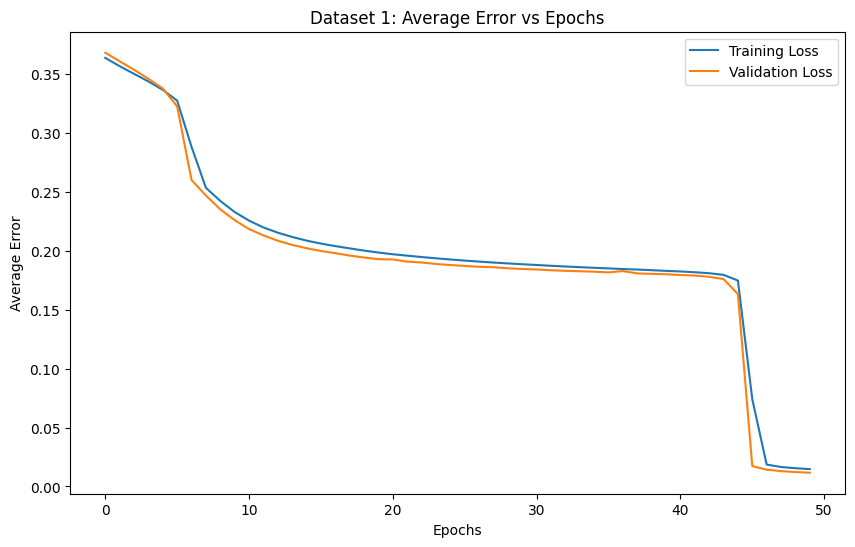

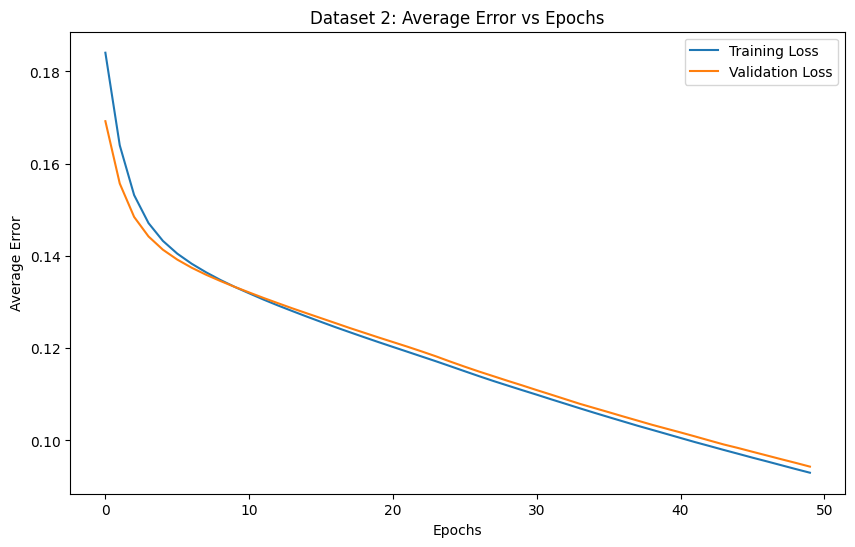

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_model(input_dim, output_dim, hidden_layers, hidden_units):
    model = Sequential()
    for units in hidden_units:
        model.add(Dense(units, input_dim=input_dim, activation='relu'))
        input_dim = units  # Update input dimension for next layer
    model.add(Dense(output_dim, activation='softmax'))
    return model

def train_model(X_train, y_train, X_val, y_val, hidden_layers, hidden_units, epochs=50, learning_rate=0.01):
    input_dim = X_train.shape[1]
    output_dim = y_train.shape[1]

    model = create_model(input_dim, output_dim, hidden_layers, hidden_units)
    sgd = SGD(learning_rate=learning_rate)
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val))

    return model, history

# Example for Dataset 1 (one hidden layer)
hidden_units_1 = [32]  # Example with 32 nodes in one hidden layer
model1, history1 = train_model(X1_train, y1_train_cat, X1_val, y1_val_cat, 1, hidden_units_1)

# Example for Dataset 2 (two hidden layers)
hidden_units_2 = [64, 32]  # Example with 64 nodes in the first hidden layer, 32 in the second
model2, history2 = train_model(X2_train, y2_train_cat, X2_val, y2_val_cat, 2, hidden_units_2)

# Plotting Average Error vs. Epochs for the best architecture
def plot_error_vs_epochs(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Average Error')
    plt.legend()
    plt.show()

plot_error_vs_epochs(history1, 'Dataset 1: Average Error vs Epochs')
plot_error_vs_epochs(history2, 'Dataset 2: Average Error vs Epochs')


336419/336419 ━━━━━━━━━━━━━━━━━━━━ 477s 1ms/step


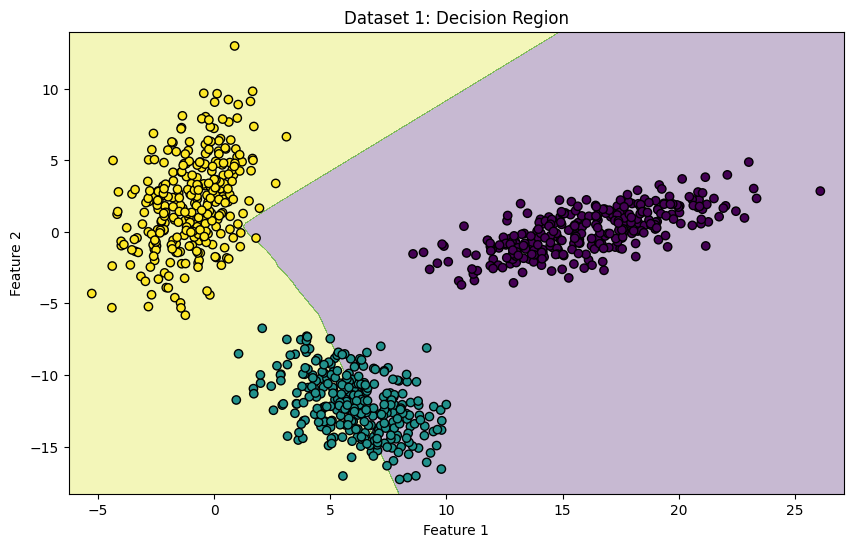

53629/53629 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step


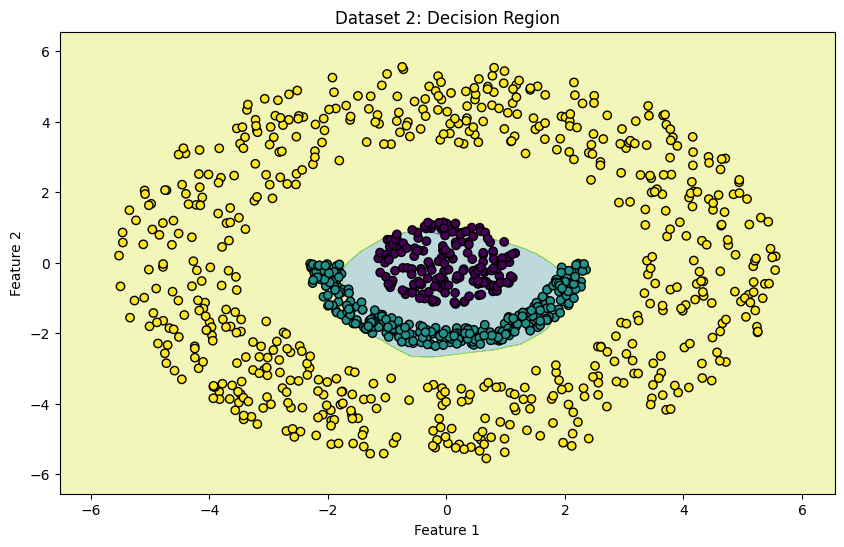

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def plot_decision_boundary(model, X, y, title):
    # Create a meshgrid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the meshgrid for prediction
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the grid points
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)  # Assuming one-hot encoded output

    # Reshape the predicted array back to the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Decision region plot for Dataset 1
plot_decision_boundary(model1, X1_train, y1_train_cat, 'Dataset 1: Decision Region')

# Decision region plot for Dataset 2
plot_decision_boundary(model2, X2_train, y2_train_cat, 'Dataset 2: Decision Region')


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Dataset 1 - Validation - Classification Accuracy: 0.9933


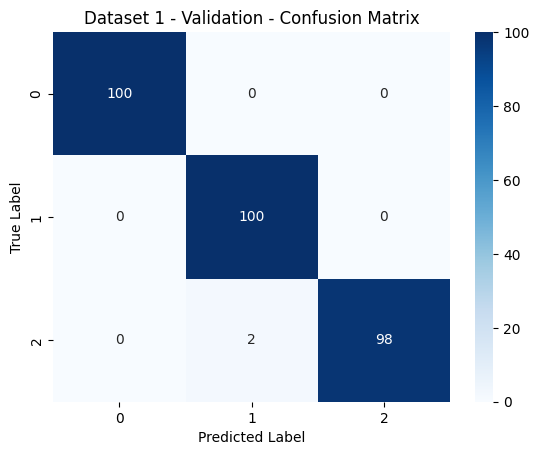

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Dataset 2 - Validation - Classification Accuracy: 0.8583


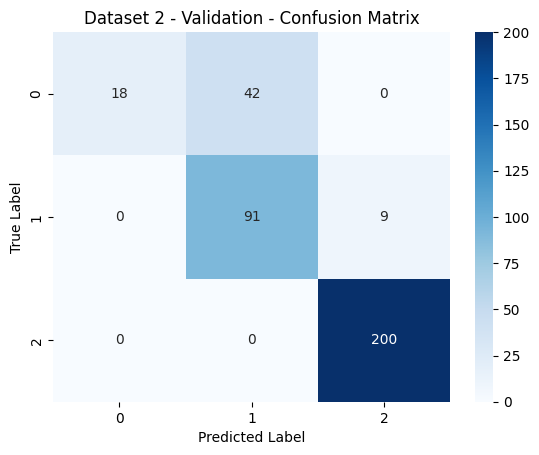

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Dataset 1 - Test - Classification Accuracy: 0.9967


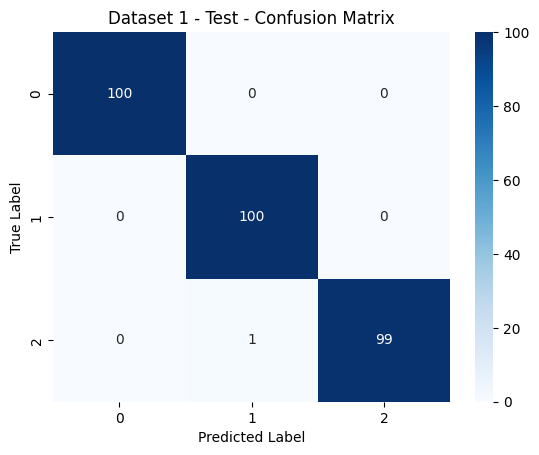

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Dataset 2 - Test - Classification Accuracy: 0.8611


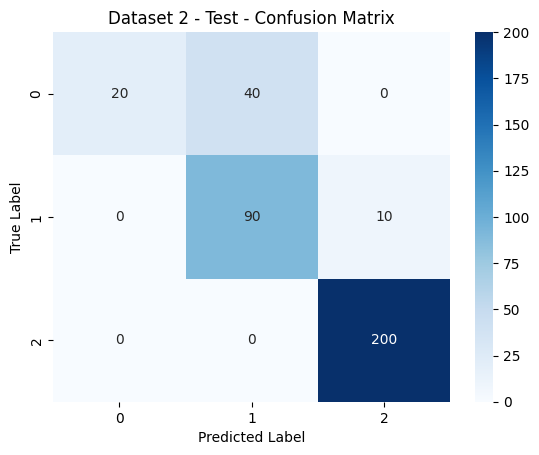

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

def evaluate_model(model, X, y_true, title):
    y_pred = np.argmax(model.predict(X), axis=1)
    y_true = np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(f'{title} - Classification Accuracy: {accuracy:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return cm, accuracy

# Validation set evaluation for different architectures
cm_val1, acc_val1 = evaluate_model(model1, X1_val, y1_val_cat, 'Dataset 1 - Validation')
cm_val2, acc_val2 = evaluate_model(model2, X2_val, y2_val_cat, 'Dataset 2 - Validation')

# Test set evaluation for the best architecture
cm_test1, acc_test1 = evaluate_model(model1, X1_test, y1_test_cat, 'Dataset 1 - Test')
cm_test2, acc_test2 = evaluate_model(model2, X2_test, y2_test_cat, 'Dataset 2 - Test')


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


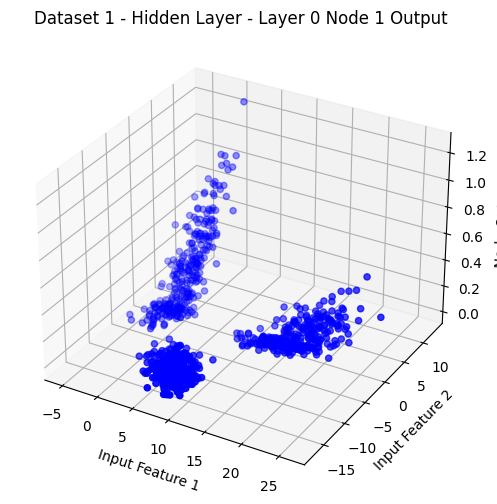

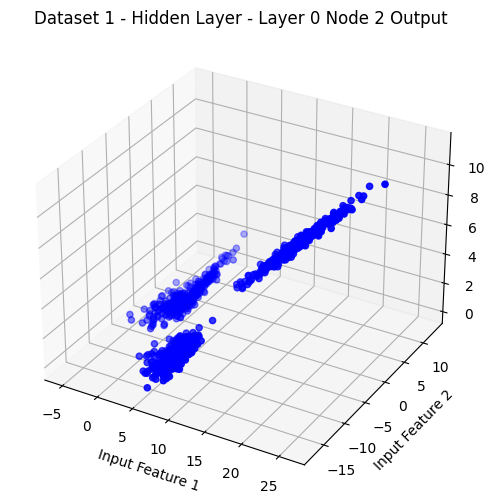

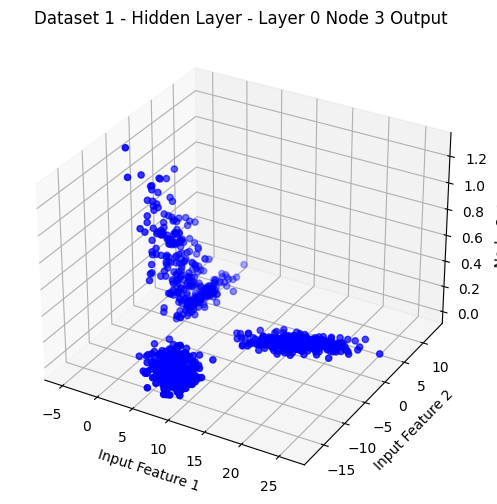

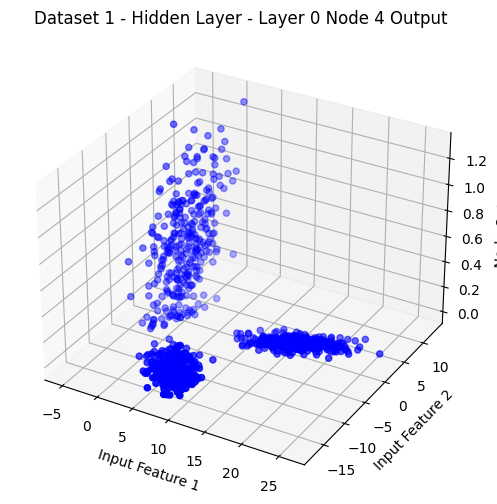

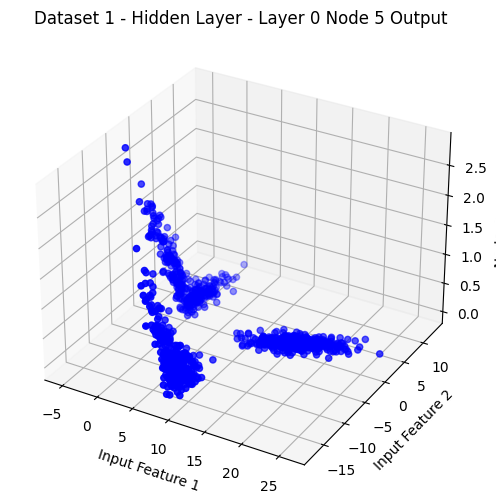

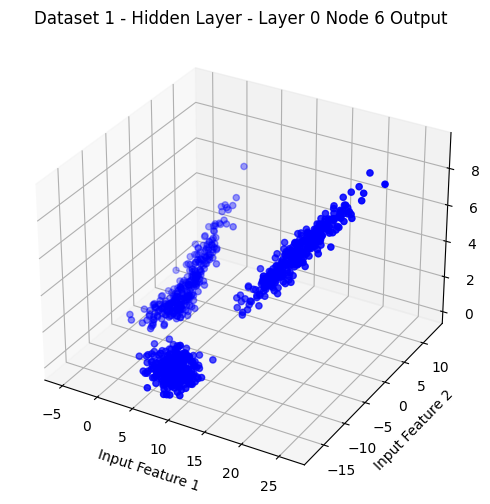

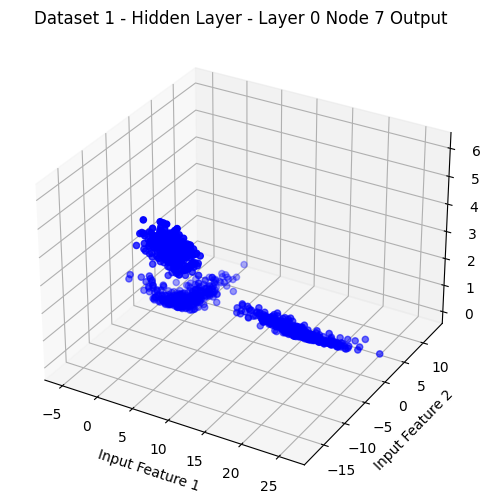

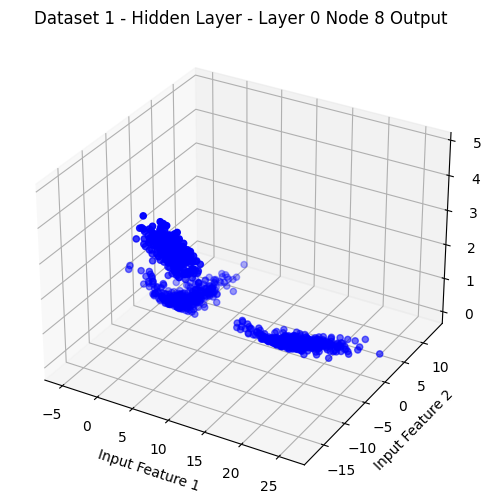

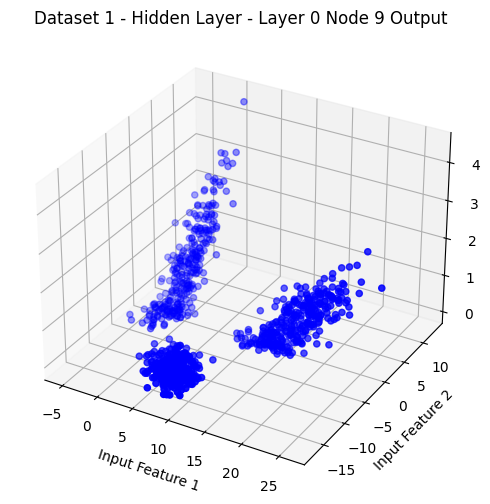

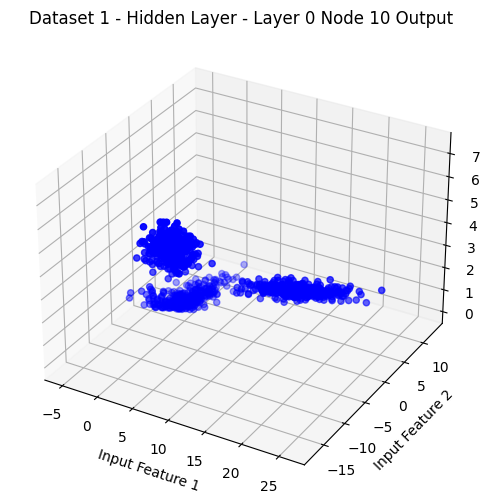

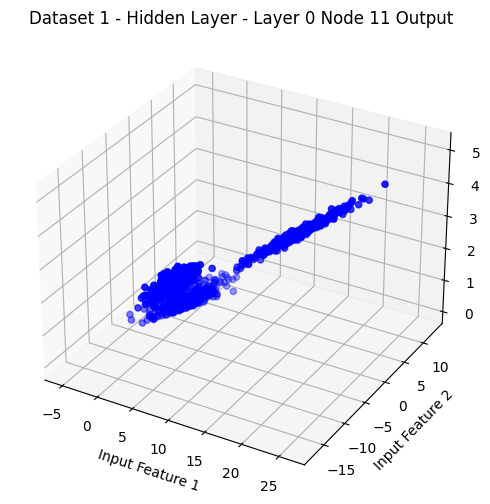

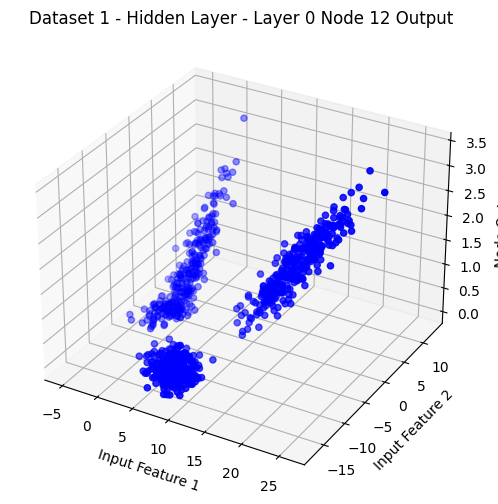

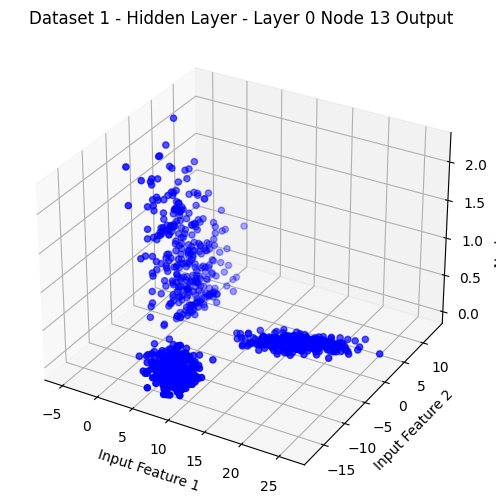

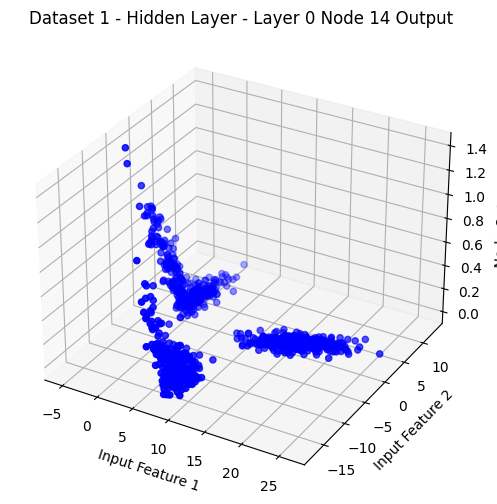

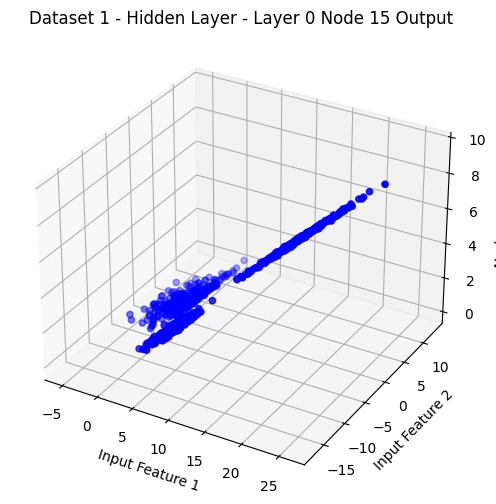

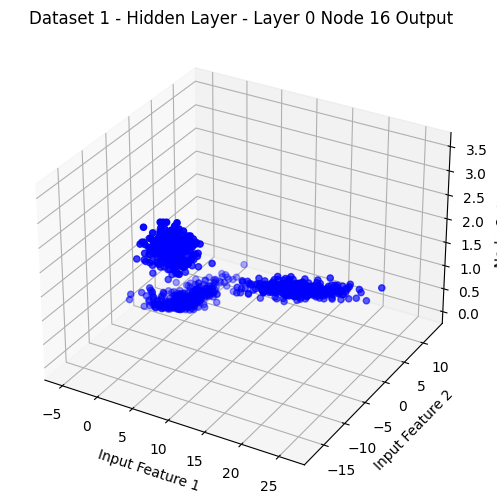

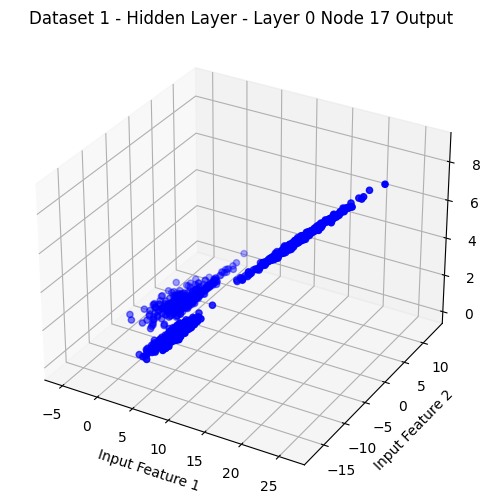

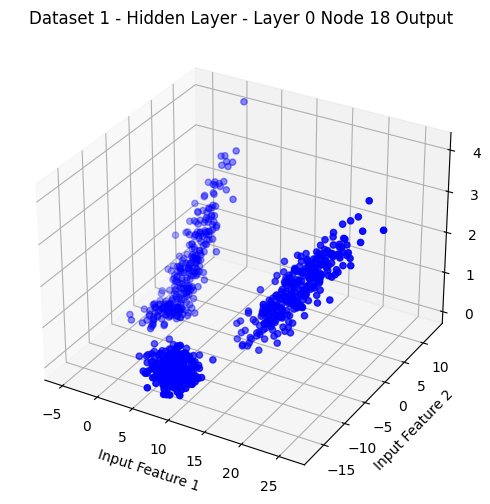

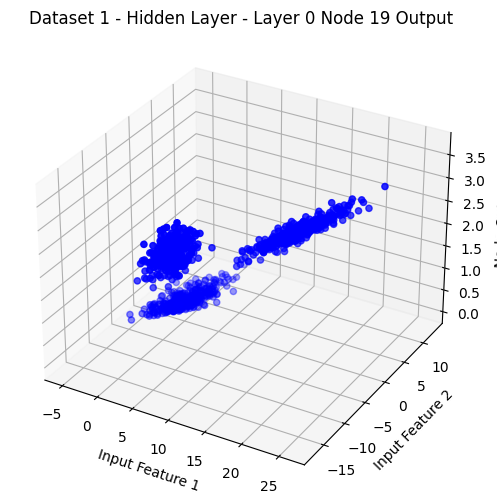

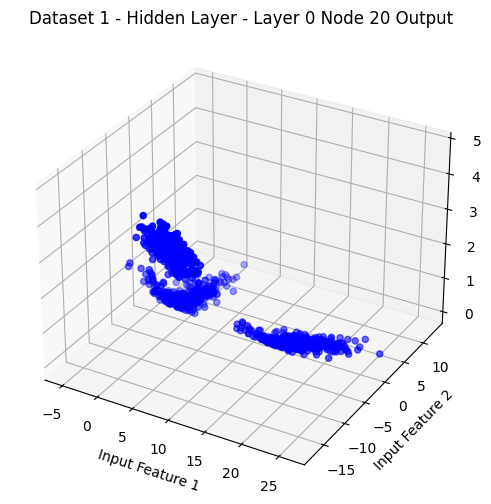

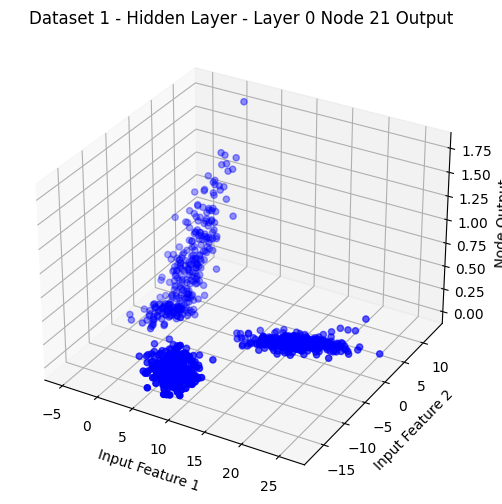

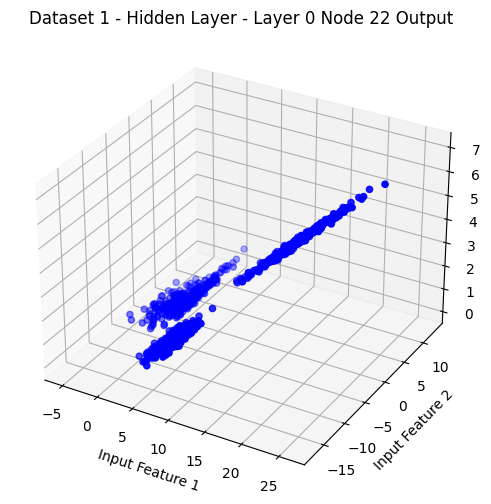

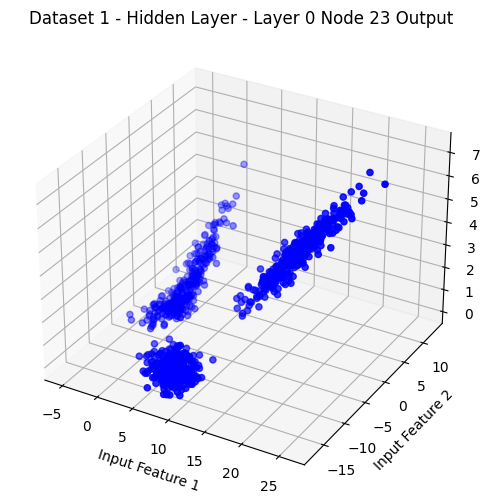

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_node_output(model, X, layer_index, title):
    intermediate_layer_model = Sequential(model.layers[:layer_index+1])
    intermediate_output = intermediate_layer_model.predict(X)

    for i in range(intermediate_output.shape[1]):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], intermediate_output[:, i], c='blue', marker='o')
        ax.set_title(f'{title} - Layer {layer_index} Node {i+1} Output')
        ax.set_xlabel('Input Feature 1')
        ax.set_ylabel('Input Feature 2')
        ax.set_zlabel('Node Output')
        plt.show()

# Plot hidden node outputs for the best architecture on Dataset 1
plot_node_output(model1, X1_train, layer_index=0, title='Dataset 1 - Hidden Layer')
plot_node_output(model1, X1_train, layer_index=1, title='Dataset 1 - Output Layer')

# Plot hidden node outputs for the best architecture on Dataset 2
plot_node_output(model2, X2_train, layer_index=0, title='Dataset 2 - Hidden Layer 1')
plot_node_output(model2, X2_train, layer_index=1, title='Dataset 2 - Hidden Layer 2')
plot_node_output(model2, X2_train, layer_index=2, title='Dataset 2 - Output Layer')


In [11]:
class Perceptron:
    def __init__(self, input_dim, lr=0.01):
        self.weights = np.zeros(input_dim + 1)
        self.lr = lr

    def predict(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(z > 0, 1, 0)

    def train(self, X, y, epochs=100):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights[1:]) + self.weights[0]
                error = target - np.where(z > 0, 1, 0)
                self.weights[1:] += self.lr * error * xi
                self.weights[0] += self.lr * error

# For Dataset 1 (Linear)
y1_train_bin = (y1_train > 0).astype(int)  # Binary labels for linear separable data
perceptron1 = Perceptron(input_dim=X1_train.shape[1])
perceptron1.train(X1_train, y1_train_bin)  # Train without indexing

y1_test_bin = (y1_test > 0).astype(int)
y1_pred = perceptron1.predict(X1_test)
print('Perceptron (Dataset 1) - Accuracy:', accuracy_score(y1_test_bin, y1_pred))

# For Dataset 2 (Non-linear)
y2_train_bin = (y2_train > 0).astype(int)
perceptron2 = Perceptron(input_dim=X2_train.shape[1])
perceptron2.train(X2_train, y2_train_bin)

y2_test_bin = (y2_test > 0).astype(int)
y2_pred = perceptron2.predict(X2_test)
print('Perceptron (Dataset 2) - Accuracy:', accuracy_score(y2_test_bin, y2_pred))


Perceptron (Dataset 1) - Accuracy: 0.9966666666666667
Perceptron (Dataset 2) - Accuracy: 0.5027777777777778


## Inferences
- Performance Analysis:

  - FCNNs should perform significantly better than single neuron models, especially on non-linearly separable data.
  - The validation accuracy and confusion matrix analysis for different architectures can help identify the most effective model.
- Hidden Layer Plots:

  - These visualizations should show how different hidden nodes respond to inputs, providing insight into the network's decision-making process.
- Comparison:

  -  The perceptron model’s accuracy is expected to be lower, especially for Dataset 2, due to its inability to handle non-linear separability.